<a href="https://colab.research.google.com/github/Nanda-Re/BasDatLanjut/blob/main/Bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
train_dir = '/content/drive/MyDrive/dataset/datasets/Train'
test_dir = '/content/drive/MyDrive/dataset/datasets/Test'

In [8]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 3805 images belonging to 2 classes.
Found 911 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/30
118/118 [==============================] - 724s 6s/step - loss: 0.2134 - accuracy: 0.9078 - val_loss: 0.1785 - val_accuracy: 0.9397
Epoch 2/30
118/118 [==============================] - 271s 2s/step - loss: 0.0660 - accuracy: 0.9830 - val_loss: 0.1276 - val_accuracy: 0.9576
Epoch 3/30
118/118 [==============================] - 266s 2s/step - loss: 0.0445 - accuracy: 0.9873 - val_loss: 0.0332 - val_accuracy: 0.9955
Epoch 4/30
118/118 [==============================] - 273s 2s/step - loss: 0.0463 - accuracy: 0.9849 - val_loss: 0.0527 - val_accuracy: 0.9833
Epoch 5/30
118/118 [==============================] - 286s 2s/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0114 - val_accuracy: 0.9944
Epoch 6/30
118/118 [==============================] - 293s 2s/step - loss: 0.0206 - accuracy: 0.9928 - val_loss: 0.0141 - val_accuracy: 0.9967
Epoch 7/30
118/118 [==============================] - 288s 2s/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0041 - val_accuracy: 0.9989

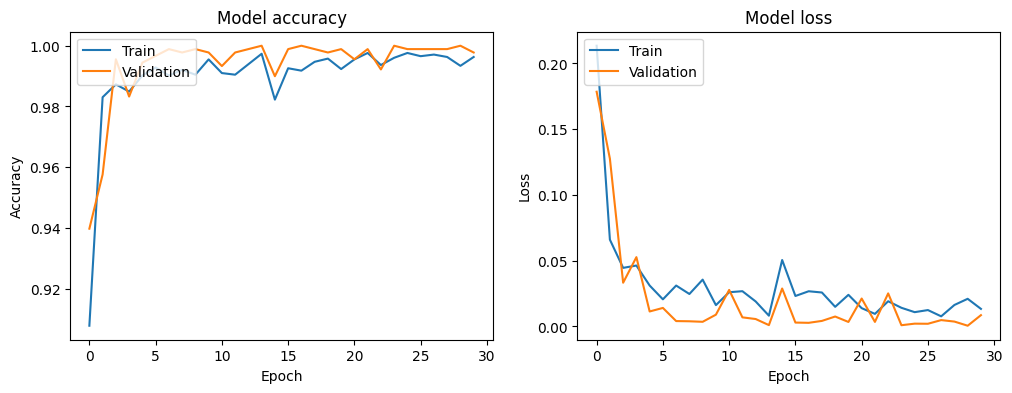

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [12]:
model.save('banana_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Load the model
model = tf.keras.models.load_model('banana_classifier_model.h5')

# Predict on a new image
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/dataset/datasets/Test/freshbanana/Screen Shot 2018-06-12 at 10.00.37 PM.png'  # Update this with the path to your image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array /= 255.0

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print('Prediction: Rotten Banana')
else:
    print('Prediction: Fresh Banana')


1/1 [==============================] - 0s 185ms/step
Prediction: Fresh Banana
